<a href="https://colab.research.google.com/github/ubiodee/llama_Finetuning/blob/main/Ludwig_0_8_Hands_On_Webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ludwig 0.8: Hands On Webinar** 🙌

👉👉 In case you missed the webinar, you can follow along with this notebook here: https://www.youtube.com/watch?v=NAyKpcOdHLE&ab_channel=Predibase

<br>

Welcome to the hands-on webinar dedicated to exploring the cutting-edge capabilities of [Ludwig](https://ludwig.ai/latest/) 0.8, an open-source package that empowers you to effortlessly build and train machine learning models like LLMs, neural networks and tree based models through declarative config files.

This interactive colab notebook will guide you through the latest features and enhancements that Ludwig 0.8 brings to the table. Whether you're a engineer looking to build with LLMs, a seasoned data scientist or just stepping into the world of Large Language Models, this session will provide you with the tools and knowledge to leverage these new capabilities.

By the end of this webinar, you will have gained a comprehensive understanding of the following key aspects:

1. **Ludwig**: An intuitive toolkit that simplifies RAG and fine-tuning for open-source Language Model Models (LLMs).
2. **Harnessing the Power of Prompts**: Dive into the intricacies of prompts and prompt templates, unlocking new dimensions in LLM interaction.
3. **Mastering Few-Shot In-Context Learning**: Explore the innovative concept of few-shot learning within context, a technique that has revolutionized how models can use information to enhance their generation.
4. **Fine-Tuning Large Language Models**: Navigate the world of model fine-tuning, delving into techniques like Deepspeed, Full Fine-Tuning, LoRA, and QLoRA, optimizing model performance to your specific compute, costs and data.

<br>

👀 If you're interested in a managed solution for training larger LLMs that require distributed training using multi-node multi-GPU setups, or for fast on-demand inference for LLMs, check out [Predibase](https://predibase.com/), the AI platform for engineers built on top of Ludwig! Try Predibase's free 14 day trial by signing up [here](https://pbase.ai/3OD77wQ)


# **Goal: Use LLMs For Code-Generation** 💻

In this webinar, the goal is to use an LLM for code generation. The model will take natural language as input, and should return code as output. We're first going to iterate on a base Llama-2-7b model with prompting, and finally instruction-fine-tune the model.

As an example, if we prompt the model with this instruction:

```
Instruction: Create an array of length 5 which contains all even numbers between 1 and 10.
```

We want the model to produce exactly this response:

```
Response: array = [2, 4, 6, 8, 10]
```



# **A Quick 2 Minute Introduction To Ludwig** ⏰

Every Ludwig model is based on a config, which requires at least input feature and one output feature to be defined. For example,

```yaml
input_features:
  - name: instruction
    type: text
output_features:
  - name: output
    type: text
```

is a simple Ludwig config that tells Ludwig to use the column called `instruction` in our dataset as an input feature and the `output` column in our dataset as an `output` feature. This is the simplest Ludwig config we can define - it's just 6 lines and works out of the box!

To make Ludwig compatible with LLMs, **Ludwig 0.8** introduced a new `model_type` called `llm` and a new keyword `base_model` that must be specified:

```yaml
model_type: llm
base_model: meta-llama/Llama-2-7b-hf
input_features:
  - name: instruction
    type: text
output_features:
  - name: output
    type: text
```

The `model_type` parameter indicates is used to tell Ludwig you want to use the LLM model type (Ludwig supports LLMs, general deep neural networks and trees).
The `base_model` parameter is the path to any HuggingFace CausalLM listed [here](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending).

Once you define your YAML Config, there are two ways you can use it with Ludwig:

- Through the Python LudwigModel API: https://ludwig.ai/latest/user_guide/api/LudwigModel/
- Through the Ludwig CLI: https://ludwig.ai/latest/user_guide/command_line_interface/

For this webinar, we're going to make use of the Python LudwigModel API. This requires just one main object during initialization: a YAML config defining your training pipeline. The initialized LudwigModel object then exposes a variety of methods like `preprocess()`, `train()`, `evaluate()` and `predict()`. We will see this in practice in the next few sections.

In general, there is feature parity across both methods so you can use the approach you're most comfortable with. To see what commands are available, create a new cell and run `!ludwig --help`.

This is all you need for now! Keeping this in mind, let's dive into the latest features in Ludwig 0.8.

## **Basic Setup** 🧰

We're going to install Ludwig, setup our HuggingFace Token and load our dataset that we will be running experiments with.

### **Install Ludwig and Ludwig's LLM related dependencies.**

Install Ludwig from the latest stable release

In [ ]:
!pip uninstall -y tensorflow --quiet
!pip install ludwig
!pip install ludwig[llm]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.5/992.5 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 11.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=f7d42d622b3ee073e5ecfd3a0710f8a6d524d613272ebae20763b534a5bcd62d
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


Install Ludwig from Ludwig master

In [ ]:
# !pip uninstall -y tensorflow --quiet
# !pip install git+https://github.com/ludwig-ai/ludwig.git@master --quiet
# !pip install "git+https://github.com/ludwig-ai/ludwig.git@master#egg=ludwig[llm]" --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 24.7 MB/s eta 0:00:00
     ━━

Enable text wrapping so we don't have to scroll horizontally and create a function to flush CUDA cache.

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))

get_ipython().events.register('pre_run_cell', set_css)

def clear_cache():
  if torch.cuda.is_available():
    model = None
    torch.cuda.empty_cache()

### **Setup Your HuggingFace Token** 🤗

We'll be exploring Llama-2 today, which a model released by Meta. However, the model is not openly-accessible and requires requesting for access (assigned to your HuggingFace token).

Obtain a [HuggingFace API Token](https://huggingface.co/settings/tokens) and request access to [Llama2-7b-hf](https://huggingface.co/meta-llama/Llama-2-7b-hf) before proceeding. You may need to signup on HuggingFace if you don't aleady have an account: https://huggingface.co/join

Incase you haven't been given access to Llama-2-7b, that is alright. We can just use Llama-1 for the rest of this example: [huggyllama/llama-7b](https://huggingface.co/huggyllama/llama-7b).

In [ ]:
import getpass
import locale; locale.getpreferredencoding = lambda: "UTF-8"
import logging
import os
import torch
import yaml

from ludwig.api import LudwigModel


os.environ["HUGGING_FACE_HUB_TOKEN"] = getpass.getpass("Token:")
assert os.environ["HUGGING_FACE_HUB_TOKEN"]

Token:··········


### **Import The Code Generation Dataset** 📋



In [ ]:
from google.colab import data_table; data_table.enable_dataframe_formatter()
import numpy as np; np.random.seed(123)
import pandas as pd

df = pd.read_json("https://raw.githubusercontent.com/sahil280114/codealpaca/master/data/code_alpaca_20k.json")

# We're going to create a new column called `split` where:
# 90% will be assigned a value of 0 -> train set
# 5% will be assigned a value of 1 -> validation set
# 5% will be assigned a value of 2 -> test set
# Calculate the number of rows for each split value
total_rows = len(df)
split_0_count = int(total_rows * 0.9)
split_1_count = int(total_rows * 0.05)
split_2_count = total_rows - split_0_count - split_1_count

# Create an array with split values based on the counts
split_values = np.concatenate([
    np.zeros(split_0_count),
    np.ones(split_1_count),
    np.full(split_2_count, 2)
])

# Shuffle the array to ensure randomness
np.random.shuffle(split_values)

# Add the 'split' column to the DataFrame
df['split'] = split_values
df['split'] = df['split'].astype(int)

# For this webinar, we will just 100 rows of this dataset.
df = df.head(n=1000)

## **Understanding The Code Alpaca Dataset** 📖




In [ ]:
df.head(10)

,instruction,input,output,split
0,Create an array of length 5 which contains all...,,"arr = [2, 4, 6, 8, 10]",0
1,Formulate an equation to calculate the height ...,,Height of triangle = opposite side length * si...,0
2,Write a replace method for a string class whic...,"string = ""Hello World!""\nreplace_with = ""Greet...","def replace(self, replace_with):\n new_stri...",0
3,Create an array of length 15 containing number...,,"arr = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33...",0
4,Write a function to find the number of distinc...,"matrix = [[1, 0, 0],\n [1, 0, 1],\n ...",def find_num_distinct_states(matrix):\n sta...,0
5,Create a nested loop to print every combinatio...,,for i in range(10):\n for j in range(10):\n...,0
6,Write a function to find the maximum differenc...,"arr = [5, 3, 17, 11, 9]",def max_difference(arr):\n max_diff = 0\n ...,0
7,Write a function to generate the nth Fibonacci...,< noinput >,def fib(n):\n if n == 0:\n return 0\...,0
8,Write a class to represent a 2D point with x a...,,"class Point:\n def __init__(self, x, y):\n ...",0
9,Write code that removes spaces from a given st...,"string = "" A B C D ""","def remove_spaces(string): \n return """".joi...",0


This dataset is meant to train a large language model to following instructions to produce code from natural language. Each row in the dataset consists of an:
- `instruction` that describes a task
- `input` when additional context is required for the instruction, and
- the expected `output`.

There are two types of instructions:

#### **Type 1: Self-Sufficient**
Instructions that are self-sufficient and require no additional context.
```
Instruction: "Create an array of length 5 which contains all even numbers between 1 and 10."
Input: None (instruction is self-sufficient)
Output: "arr = [2, 4, 6, 8, 10]"
```

These examples are useful for training models to understand and follow instructions independently. They can be applied in various scenarios, including:

- **Coding Tasks**: Teaching a model to generate code based on a clear instruction. For instance, generating a function to sort an array in a specific way.
- **Mathematical Calculations**: Instructing a model to perform calculations or equations, such as finding the area of a shape given its dimensions.
- **Data Manipulation**: Showing how to process data, like filtering, transforming, or aggregating data based on given criteria.
- **Writing Instructions**: Training models to generate instructional content, like recipes, guides, or tutorials.

#### **Type 2: Need Context**
The instruction needs additional context provided in the `input` to complete the task.
```
Instruction: "Write a replace method for a string class which replaces the given string with a given set of characters."
Input: "string = 'Hello World!' replace_with = 'Greetings!'"
Output:
def replace(string, replace_with):
    new_string = ""
    for char in string:
        if char == " ":
            new_string += replace_with
        else:
            new_string += char
    return new_string
```

These examples are useful for training models to understand both the instruction and relevant context provided by the input. They find application in scenarios such as:

- **Customized Code Generation**: Teaching a model to generate code that depends on specific inputs. For instance, creating a function to calculate a mathematical result given input parameters.
- **Conditional Responses**: Guiding models to produce outputs that change based on different input conditions (think of a instruction that has different criteria for different letter grades, and then a conditional input like score = 85/100)
- **Dynamic Content Creation**: Training models to generate content based on variable input, such as dynamic forms, letters, or responses to user queries.
- **Configurable Processes**: Demonstrating how to perform tasks with customizable settings, like configuring a software component using provided parameters.


As you can see below, the dataset is pretty balanced in terms of the number of examples of each type of instruction (also true for the full dataset with 20,000 rows).

In [ ]:
num_self_sufficient = (df['input'] == '').sum()
num_need_contex = df.shape[0] - num_self_sufficient

# We are only using 100 rows of this dataset for this webinar
print(f"Total number of examples in the dataset: {df.shape[0]}")

print(f"% of examples that are self-sufficient: {round(num_self_sufficient/df.shape[0] * 100, 2)}")
print(f"% of examples that are need additional context: {round(num_need_contex/df.shape[0] * 100, 2)}")

Total number of examples in the dataset: 100
% of examples that are self-sufficient: 49.0
% of examples that are need additional context: 51.0


The other aspect worth noting is the average number of characters in each of the three columns `instruction`, `input` and `output` in the dataset. Typically, every 3-4 characters maps to a *token* (the basic building blocks that language models use to understand and analyze text data), and large language models have a limit on the number of tokens they can take as input.

The maximum context length for the base LLaMA-2 model is 4096 tokens. Ludwig automatically truncates texts that are too long for the model, but looking at these sequence lengths, we should be able to fine-tune on full length examples without needing any truncation.





Average number of tokens in the instruction column: 23
Average number of tokens in the input column: 8
Average number of tokens in the output column: 65



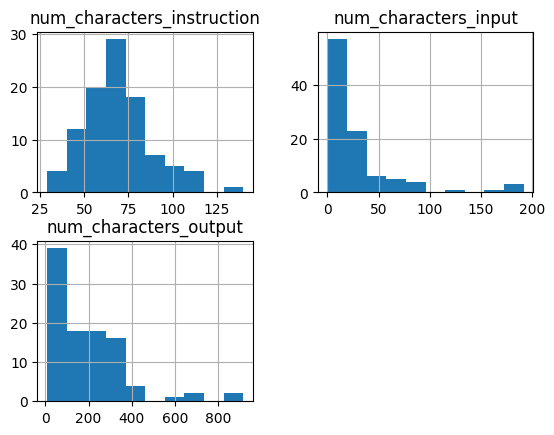

In [ ]:
# Calculating the length of each cell in each column
df['num_characters_instruction'] = df['instruction'].apply(lambda x: len(x))
df['num_characters_input'] = df['input'].apply(lambda x: len(x))
df['num_characters_output'] = df['output'].apply(lambda x: len(x))

# Show Distribution
df.hist(column=['num_characters_instruction', 'num_characters_input', 'num_characters_output'])

# Calculating the average
average_chars_instruction = df['num_characters_instruction'].mean()
average_chars_input = df['num_characters_input'].mean()
average_chars_output = df['num_characters_output'].mean()

print(f'Average number of tokens in the instruction column: {(average_chars_instruction / 3):.0f}')
print(f'Average number of tokens in the input column: {(average_chars_input / 3):.0f}')
print(f'Average number of tokens in the output column: {(average_chars_output / 3):.0f}', end="\n\n")

## **Prompt Templating and Zero Shot Inference**

**Zero-shot learning is a capability enabled by Large Language Models, allowing them to generalize to tasks or domains they have never been explicitly trained on.** This approach leverages the inherent knowledge and linguistic understanding encoded within the model during its pretraining phase.

Zero-shot learning involves presenting the model with a task description or prompt, along with some context, and expecting it to generate a relevant response or output. The key idea is that the model can understand and generate coherent content even for tasks it hasn't been explicitly fine-tuned for.

<img src="https://ludwig.ai/latest/images/icl_zero_shot_learning.png" alt="ICL" width="650"/>

In Ludwig, there are two parameters we can use to control prompting and the quality of generation when trying to use the LLM for zero-shot inference:
- `prompt`: the prompt parameter can be used to
  - Provide necessary boilerplate needed to make the LLM respond in the correct way (for example, with a response to a question rather than a continuation of the input sequence).
  - Combine multiple columns from a dataset into a single text input feature.
  - Provide additional context to the model that can help it understand the task, or provide restrictions to prevent hallucinations (producing false information confidently). <br>

  All of this can be configured through the nested keyword called `template`. The template allows regular text to describe the task, but also allows two special group of keywords that can be used:
  - **Reserved Keywords**: `{__sample__}`, `{__task__}` and `{__context__}`
  - **Feature Names**: If you have additional feature names you want to combine into your prompt, you can add them using the same `{}` template without the `__`. For e.g., in our case, we have three columns: `instruction`, `input` and `output`. We can refer to the `instruction` and `input` data via the `{instruction}` and `{input}`. We will see this in our example below.

  See the full docs for prompt [here](https://ludwig.ai/latest/configuration/large_language_model/#prompt).

- `generation`: You may often want to control the generation process, such as what token decoding strategy to use, how many new tokens to produce, which tokens to exclude, or how diverse you want the generated text to be. See the full docs [here](https://ludwig.ai/latest/configuration/large_language_model/#generation).

Let's try and perform some zero-shot prompting with Ludwig to see how the model does on our task out of the box.

In [ ]:
zero_shot_config = yaml.safe_load(
  """
  model_type: llm
  base_model: meta-llama/Llama-2-7b-hf

  input_features:
    - name: instruction
      type: text

  output_features:
    - name: output
      type: text

  prompt:
    template: >-
      Below is an instruction that describes a task, paired with an input
      that may provide further context. Write a response that appropriately
      completes the request.

      ### Instruction: {instruction}

      ### Input: {input}

      ### Response:

  generation:
    temperature: 0.1 # Temperature is used to control the randomness of predictions.
    max_new_tokens: 512

  preprocessing:
    split:
      type: fixed

  quantization:
    bits: 4

  defaults:
    text:
      preprocessing:
        max_sequence_length: 256
  """
)

# Just run on 10 examples for now
model = LudwigModel(config=zero_shot_config, logging_level=logging.INFO)
results = model.train(dataset=df)

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒════════════════════════╕
INFO:ludwig.utils.print_utils:│ EXPERIMENT DESCRIPTION │
INFO:ludwig.utils.print_utils:╘════════════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/results/api_experiment_run                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────

INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'None': 152 (without start and stop symbols)
INFO:ludwig.features.text_feature:Setting max length using dataset: 154 (including start and stop symbols)
INFO:ludwig.features.text_feature:max sequence length is 154 for feature 'None'
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'output': 275 (without start and stop symbols)
INFO:ludwig.features.text_feature:Setting max length using dataset: 277 (including start and stop symbols)
INFO:ludwig.featur

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:ludwig.models.llm:Done.
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒══════════╕
INFO:ludwig.utils.print_utils:│ TRAINING │
INFO:ludwig.utils.print_utils:╘══════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.trainers.trainer_llm:
Running evaluation for step: 0, epoch: 0


Evaluation valid:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a jsx code that renders a "hello, world!" message in the browser.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a jsx code that renders a "hello, world!" message in the browser.
### input: 
### response: 
### instruction: create a jsx code that renders a "hello, world!" message in the browser.
### input: 
### response:

Evaluation valid:  25%|██▌       | 1/4 [00:47<02:22, 47.52s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: generate a random number between 0 and 1 (inclusively).
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: generate a random number between 0 and 1 (inclusively).
### input: 
### response: 
### instruction: generate a random number between 0 and 1 (inclusively).
### input: 
### response: 
### instruction: generate a random number between

Evaluation valid:  50%|█████     | 2/4 [01:31<01:31, 45.57s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a quick-sort algorithm in python.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a quick-sort algorithm in python.
### input: 
### response:
### instruction: create a quick-sort algorithm in python.
### input:
### response:
### instruction: create a quick-sort algorithm in python.
### input:
### response:
### instructio

Evaluation valid:  75%|███████▌  | 3/4 [02:14<00:44, 44.50s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write a function that takes in a list of numbers and prints out the greatest number.
### input: list = [8, 2, 14, 25]
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write a function that takes in a list of numbers and prints out the greatest number.
### input: list = [8, 2, 14, 25]
### response: 25
### instruction: write a function that takes in

Evaluation test :   0%|          | 0/8 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a c++ program for randomly shuffling an array of integers.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a c++ program for randomly shuffling an array of integers.
### input: 
### response:
### instruction: create a c++ program for randomly shuffling an array of integers.
### input:
### response:
### instruction: creat

Evaluation test :  12%|█▎        | 1/8 [00:44<05:09, 44.28s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: remove the boilerplate code from the program for printing 10 random numbers.
### input: import random

# generate 10 random numbers
for i in range(10):
    # todo
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: remove the boilerplate code from the program for printing 10 random numbers.
### input: import random

# generate 10 random numbers
for i

Evaluation test :  25%|██▌       | 2/8 [01:30<04:32, 45.43s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write an sql query to calculate the average order price for each product category in the "orders" table.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write an sql query to calculate the average order price for each product category in the "orders" table.
### input: 
### response:
### instruction: write an sql query to calculate the

Evaluation test :  38%|███▊      | 3/8 [02:13<03:41, 44.34s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: change the variable `x` to the data type desired.
### input: x = 'hello world!'
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: change the variable `x` to the data type desired.
### input: x = 'hello world!'
### response: x = 'hello world!'
### instruction: change the variable `x` to the data type desired.
### input: x = 'hello world!'
### respon

Evaluation test :  50%|█████     | 4/8 [02:58<02:57, 44.45s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: is it possible to set a breakpoint that is not associated with any source code line in a gdb program?
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: is it possible to set a breakpoint that is not associated with any source code line in a gdb program?
### input: 
### response:
### instruction: is it possible to set a breakpoint that i

Evaluation test :  62%|██████▎   | 5/8 [03:41<02:12, 44.04s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a table to store customer information.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a table to store customer information.
### input: 
### response: 
### instruction: create a table to store customer information.
### input: 
### response: 
### instruction: create a table to store customer information.
### input: 
### 

Evaluation test :  75%|███████▌  | 6/8 [04:24<01:27, 43.67s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: parse the string and return the number of unique alphabets in the string.
### input: stringinput = "apple"
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: parse the string and return the number of unique alphabets in the string.
### input: stringinput = "apple"
### response: 1
### instruction: parse the string and return the number of unique alph

Evaluation test :  88%|████████▊ | 7/8 [05:06<00:43, 43.30s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write a function to remove all whitespace characters from a given string.
### input: mystring = "hello   world    "
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write a function to remove all whitespace characters from a given string.
### input: mystring = "hello   world    "
### response: removeWhitespace(mystring) = "hello world"
### instruc

Evaluation test : 100%|██████████| 8/8 [05:49<00:00, 43.72s/it]

INFO:ludwig.trainers.trainer_llm:Evaluation took 8m 48.6354s

INFO:ludwig.utils.metrics_printed_table:╒════════════╤═══════════════════╤════════════════════╤═════════════════════════╤════════════════╤═════════════════════╤══════════════════╕
│ output     │ char_error_rate   │ loss               │ next_token_perplexity   │ perplexity     │ sequence_accuracy   │ token_accuracy   │
╞════════════╪═══════════════════╪════════════════════╪═════════════════════════╪════════════════╪═════════════════════╪══════════════════╡
│ train      │                   │                    │                         │                │                     │                  │
├────────────┼───────────────────┼────────────────────┼─────────────────────────┼────────────────┼─────────────────────┼──────────────────┤
│ validation │ 0.99365234375     │ 10.373493194580078 │ 32000.064453125         │ 32000.00390625 │ 0.0                 │ 0.0              │
├────────────┼───────────────────┼────────────────────┼───

#### **Observations From Zero Shot Prompting Results** 🔍
1. The base Llama-2 model is generally good at producing coherent English text as responses.
2. When it doesn't know how to respond (which seems to be true most of the times we want it to follow an instruction), it just returns the input over and over again until the token limit is reached. Sometimes it even modifies the original instruction in the process.
3. It doesn't know when to stop producing a response, i.e., it gets confused and just produces till we set a hard stop through the number of maximum allowed tokens. In an ideal scenario, the probability distribution being used to generate the next token predicts a stop token at the right point in time.
4. It doesn't get even one of the input prompts correct.

⭐ **None of these results are surprising, but it goes to show that while a model like Llama-2 can be good on general tasks, it can often be very poor at performing domain specific tasks out of the box just through zero shot/regular prompting (pretrained knowledge without any additional context)** ⭐

### **Few Shot Learning**

Few-shot learning is a variant of zero-shot learning that involves providing a static set of labeled examples to the model in order to help it perform the task. For example, if a user provides the prompt translate from English to French:, followed by a few English-French translation pairs, followed by the English text to translate, the LLM will generate French text that is a translation of the English text.

This often results in better performance than zero-shot learning, but requires a small amount of labeled data. The amount of data required can range greatly, from a single example to a few hundred. The exact amount of data required depends on the task, the maximum context length of the LLM, and the relative strength of the model.

<br><img src="https://ludwig.ai/latest/images/icl_few_shot_learning.png" alt="ICL" width="550"/><br><br>


While Few Shot Learning is supported in Ludwig, for this webinar we will not be running an example of this. Instead, we will focus on Retrieval Augmented In-Context Learning, also often referred to as RAG.

You can do few shot learning by modifying the prompt template in your config to have these demonstration pairs as part of the prompt. For e.g.,

```yaml
prompt:
  template: >-
    Here is some context for the task below.

    ###
    Instruction: Write a MySQL query to display the name, job and salary of all employees.
    Input:
    Output: SELECT name, job, salary FROM employees;

    Instruction: Write a JavaScript code snippet to remove the last element from an array.
    Input: Array: [1, 2, 3, 4, 5]
    Output: let array = [1, 2, 3, 4, 5]; array.pop(); console.log(array);
    ###

    Below is an instruction that describes a task, paired with an input
    that may provide further context. Write a response that appropriately
    completes the request using the provided instruction and input, as well
    as the example context above.

    ### Instruction: {instruction}

    ### Input: {input}

    ### Response:
```

One of the major limitations of this approach is that the performance of few-shot learning heavily relies on the quality and relevance of the provided demonstrations. If the demonstrations are not representative or do not cover all possible variations of the task, the model's performance can suffer. It is also possible that the provided demonstrations are not exactly relevant for the task (say it could be a different domain or something too specific for the task we want the model to solve), which also hurts the model's ability to generate accurate responses.

### **Retrieval Augmented In-Context Learning (ICL, RAG)** 🔎


Retrieval-augmented in-context learning is a variant of few shot learning and involves using an information retrieval process to insert additional context into the prompt. This is often done by using a text embedding model to encode a database of text pairs (typically an input text and its corresponding desired response text), and then using the nearest neighbor of the encoded prompt to insert additional context into the prompt. Because we use embeddings, this inserts the most semantically similar data from our dataset into the prompt context.

This is related to few-shot learning in that we inject labeled data into the prompt. The difference is that the "shots" included in the prompt are dynamic, not static. We may have many more examples than can fit into the prompt, and we use a retrieval process to select the most relevant examples to include in the prompt.


<br><img src="https://ludwig.ai/latest/images/icl_retrieval_augmented_icl.png" alt="RAG" width="650"/><br><br>

Architecture
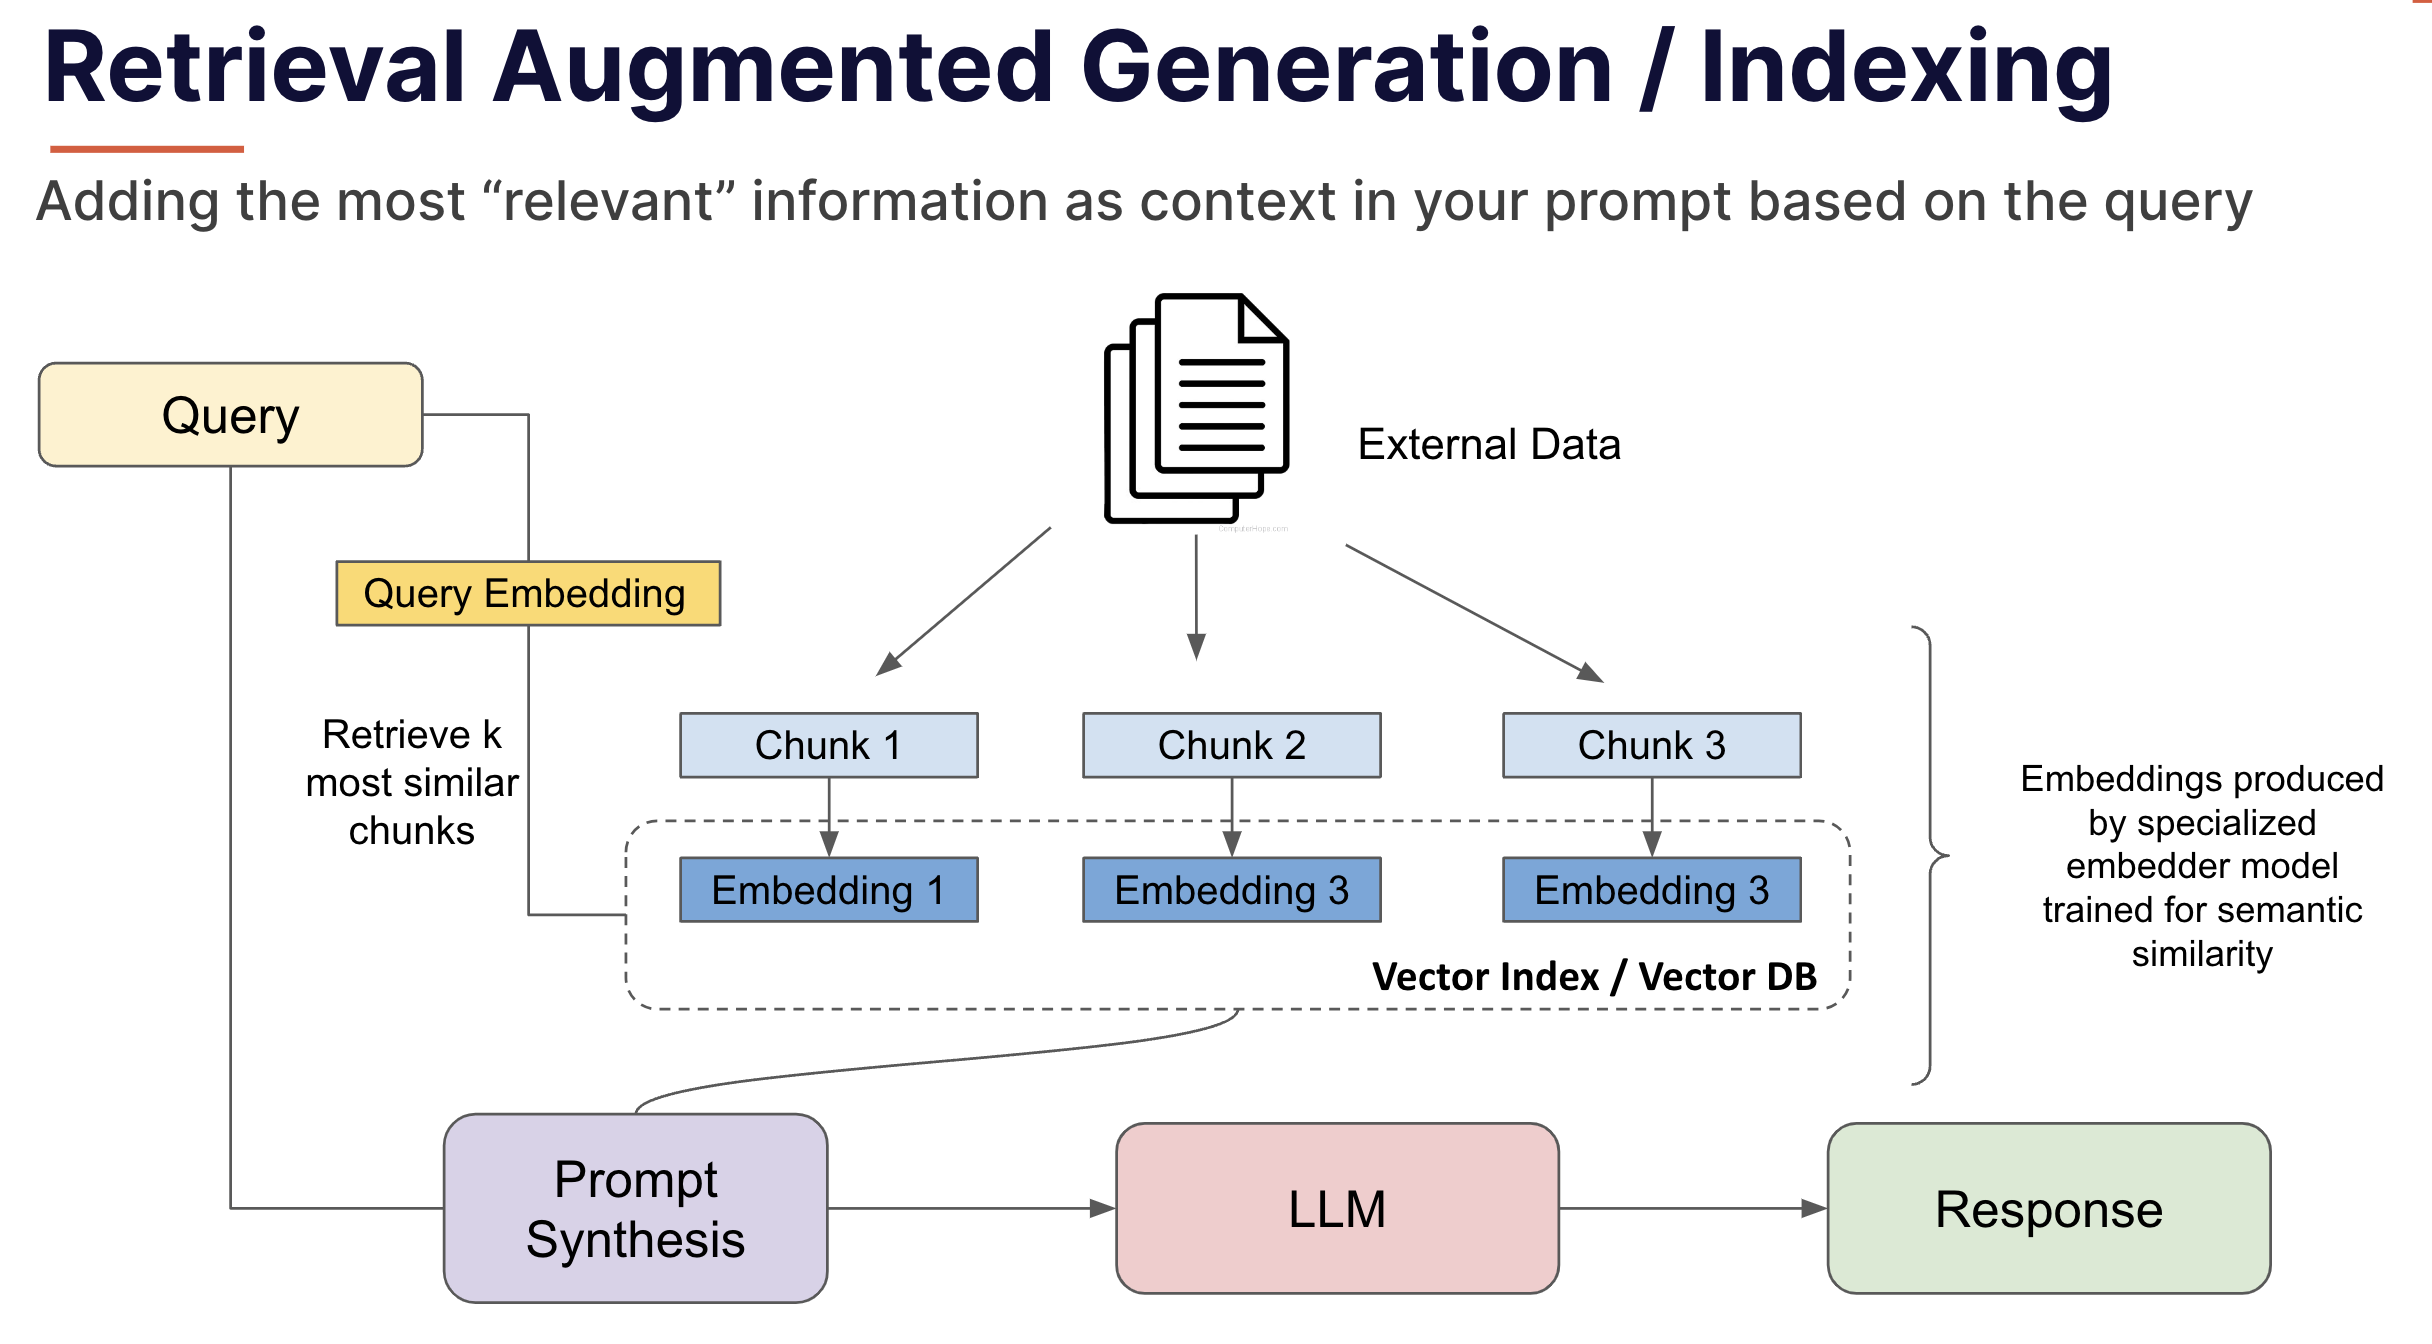

It is very easy to go from our zero shot configuration to performing few shot retrieval augmented generation - we just have to add a new `retrieval` keyword to the prompt. See the docs [here](https://ludwig.ai/latest/configuration/large_language_model/#retrieval).

- `type`: Either 'random' or 'semantic'. Samples are retrieved from an index of the training set and used to augment the input to the model in a few-shot learning setting. Random just picks samples to randomly insert, while semantic does semantic similarity to insert the most contextually similar examples into the prompt.
- `model_name`: The model used to generate the embeddings used to retrieve samples to inject in the prompt. Any good embedding model can be selected from https://huggingface.co/models?library=sentence-transformers
- `k` (default: 0): The number of samples to retrieve.

Additionally, the `split` column we had created when importing the dataset comes in use now - the samples inserted into the prompt are retrieved from the train split, and we evaluate the performance on the validation and test splits.

In [ ]:
clear_cache()

icl_config = yaml.safe_load(
  """
  model_type: llm
  base_model: meta-llama/Llama-2-7b-hf

  input_features:
    - name: instruction
      type: text

  output_features:
    - name: output
      type: text

  prompt:
    template: >-
      Here is some context for the task below.
      ###
      {__context__}
      ###

      Below is an instruction that describes a task, paired with an input
      that may provide further context. Write a response that appropriately
      completes the request.

      ### Instruction: {instruction}

      ### Input: {input}

      ### Response:
    retrieval:
      type: semantic
      model_name: sentence-transformers/all-mpnet-base-v2
      k: 1 # typically at least 3 to 5

  generation:
    temperature: 0.1
    max_new_tokens: 512

  preprocessing:
    split:
      type: fixed

  quantization:
    bits: 4

  defaults:
    text:
      preprocessing:
        max_sequence_length: 256
  """
)

model = LudwigModel(config=icl_config, logging_level=logging.INFO)
results = model.train(dataset=df)

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒════════════════════════╕
INFO:ludwig.utils.print_utils:│ EXPERIMENT DESCRIPTION │
INFO:ludwig.utils.print_utils:╘════════════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/results/api_experiment_run_0                                                   │
├──────────────────┼─────────────────────────────────────────────────────────────────

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:ludwig.models.llm:Done.
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒══════════╕
INFO:ludwig.utils.print_utils:│ TRAINING │
INFO:ludwig.utils.print_utils:╘══════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.trainers.trainer_llm:
Running evaluation for step: 0, epoch: 0


Evaluation valid:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'write a function in html for creating a table of n rows and m columns.', 'output': '<table>\n  <tbody>\n    <% for (let i = 0; i < n; i++) { %>\n      <tr>\n        <% for (let j = 0; j < m; j++) { %>\n          <td>cell content</td>\n        <% } %>\n      </tr>\n    <% } %>\n  </tbody>\n</table>'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a jsx code that renders a "hello, world!" message in the browser.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: here is some context for

Evaluation valid:  25%|██▌       | 1/4 [00:44<02:12, 44.21s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'generate a random integer between 4 and 8 (inclusively).', 'output': 'import random\nx = random.randint(4, 8)'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: generate a random number between 0 and 1 (inclusively).
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: here is some context for the task below. ### [{'instruction': 'generate a random integer between 4 and 8 (inclusively).', 'output': 'import random\nx = random.randint(4, 8)'}] ###
below is an instruction that describes a task, pai

Evaluation valid:  50%|█████     | 2/4 [01:28<01:28, 44.26s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'edit the python code so that it prints out the total number of elements in the list.', 'output': 'list = [1, 2, 3, 4, 5]\nprint("total number of elements in the list: ", len(list))'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a quick-sort algorithm in python.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: here is some context for the task below. ### [{'instruction': 'edit the python code so that it prints out the total number of elements in the list.', 'output': 'list = [1, 2,

Evaluation valid:  75%|███████▌  | 3/4 [02:13<00:44, 44.81s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'write a function to find the maximum difference between two numbers in a given array.', 'output': 'def max_difference(arr):\n    max_diff = 0\n    for i in range(len(arr)-1):\n        diff = arr[i+1] - arr[i]\n        if diff > max_diff:\n            max_diff = diff\n    return max_diff'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write a function that takes in a list of numbers and prints out the greatest number.
### input: list = [8, 2, 14, 25]
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: he

Evaluation test :   0%|          | 0/8 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'write a c++ code to find the average of an array of integers.', 'output': '#include <iostream>\n\nint calculateaverage(int array[], int n){\n    int sum = 0; \n    for (int i=0; i<n; i++){\n        sum += array[i]; \n    } \n    int average = sum/n;\n    return average;\n}'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a c++ program for randomly shuffling an array of integers.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: here is some context for the task below. ### [{'instruct

Evaluation test :  12%|█▎        | 1/8 [00:43<05:05, 43.63s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'write a c++ function to generate a random integer between 0 and 10.', 'output': '#include <iostream> \n#include <cstdlib> \n#include <ctime> \nusing namespace std; \n\nint randomintgenerator() \n{ \n   // setting the seed \n   srand(time(0)); \n\n   // generating random integer \n   return (rand()%11); \n}'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: remove the boilerplate code from the program for printing 10 random numbers.
### input: import random

# generate 10 random numbers
for i in range(10):
    # todo
### response:
INFO:ludwig.model

Evaluation test :  25%|██▌       | 2/8 [01:27<04:22, 43.69s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'write a sql query to calculate the total number of orders in the "orders" table.', 'output': 'select count(*) as "total number of orders" \nfrom orders;'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write an sql query to calculate the average order price for each product category in the "orders" table.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: here is some context for the task below. ### [{'instruction': 'write a sql query to calculate the total number of orders in the "orders" t

Evaluation test :  38%|███▊      | 3/8 [02:11<03:40, 44.08s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'write code that removes spaces from a given string.', 'output': 'def remove_spaces(string): \n    return "".join(string.split())'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: change the variable `x` to the data type desired.
### input: x = 'hello world!'
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: here is some context for the task below. ### [{'instruction': 'write code that removes spaces from a given string.', 'output': 'def remove_spaces(string): \n    return "".join(string.split())'}] ###


Evaluation test :  50%|█████     | 4/8 [02:55<02:55, 43.82s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'use the function to debug the given program and prevent the segmentation fault.', 'output': '#include <stdio.h>\n\nint main() {\n    int array[] = {1, 2, 3, 4, 5};\n    int n = 5;\n    int i;\n    // limit loop size to the length of the array\n    for (i = 0; i < n; i++) {\n        printf("%d\\n", array[i]);\n    }\n    return 0;\n}'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: is it possible to set a breakpoint that is not associated with any source code line in a gdb program?
### input: 
### response:
INFO:ludwig.models.llm:Decoded generate

Evaluation test :  62%|██████▎   | 5/8 [03:38<02:10, 43.63s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': "write a mysql query to print the column names of a table named 'employees'.", 'output': "select column_name from information_schema.columns where table_name = 'employees';"}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: create a table to store customer information.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: here is some context for the task below. ### [{'instruction': "write a mysql query to print the column names of a table named 'employees'.", 'output': "select column_name from in

Evaluation test :  75%|███████▌  | 6/8 [04:23<01:27, 43.89s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'create a dictionary for counting the occurrence of each letter in the given string.', 'output': 'string = "hello world"\nletter_counts = {}\n\nfor letter in string:\n    if letter in letter_counts:\n       letter_counts[letter] += 1\n    else:\n        letter_counts[letter] = 1\n\nprint(letter_counts)'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: parse the string and return the number of unique alphabets in the string.
### input: stringinput = "apple"
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch

Evaluation test :  88%|████████▊ | 7/8 [05:09<00:44, 44.66s/it]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: here is some context for the task below. ### [{'instruction': 'write code that removes spaces from a given string.', 'output': 'def remove_spaces(string): \n    return "".join(string.split())'}] ###
below is an instruction that describes a task, paired with an input that may provide further context. write a response that appropriately completes the request.
### instruction: write a function to remove all whitespace characters from a given string.
### input: mystring = "hello   world    "
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: here is some context for the task below. ### [{'instruction': 'write code that removes spaces from a given string.', 'output': 'def remove_spaces(string): \n    re

Evaluation test : 100%|██████████| 8/8 [05:54<00:00, 44.32s/it]

INFO:ludwig.trainers.trainer_llm:Evaluation took 8m 52.4115s

INFO:ludwig.utils.metrics_printed_table:╒════════════╤═══════════════════╤════════════════════╤═════════════════════════╤════════════════╤═════════════════════╤══════════════════╕
│ output     │ char_error_rate   │ loss               │ next_token_perplexity   │ perplexity     │ sequence_accuracy   │ token_accuracy   │
╞════════════╪═══════════════════╪════════════════════╪═════════════════════════╪════════════════╪═════════════════════╪══════════════════╡
│ train      │                   │                    │                         │                │                     │                  │
├────────────┼───────────────────┼────────────────────┼─────────────────────────┼────────────────┼─────────────────────┼──────────────────┤
│ validation │ 0.99267578125     │ 10.373493194580078 │ 32000.064453125         │ 32000.00390625 │ 0.0                 │ 0.0              │
├────────────┼───────────────────┼────────────────────┼───

#### **Observations From Retrieval Augmented ICL Results** 🔎
- We can use an embedding model to dynamically retrieve examples from the dataset and insert it into the prompt, based on examples that are most semantically similar to our input query.
- Adding even just 1 demonstration does not seem to aid the model in producing correct code output. The LLM still struggles to respond back correctly. This could be because we're:
  - Only using 100 rows of data, but we might do significantly better if we used all of our training data (about 18K rows in the train set) as potential candidates for the embedding model to retrieve.
  - Inserting too few examples into the prompt as context (we should increase the value of `k`)
  - Using an embedding model that isn't very good, so we could iterate by picking another embedding model from https://huggingface.co/models?library=sentence-transformers
  - The prompt requires even more context beyond just some demonstrations. For e.g., we could more explicitly describe how functions and classes are defined in Python and other programming languages. The tradeoff is that it takes up more tokens in our input prompt.
  - The task is too hard to solve just through prompting. It may require fine-tuning the weights to teach the model how to follow instructions for this type of task.

# **Declaratively Fine-Tune Large Language Models**

Fine-tuning a large language model **refers to the process of further training the pre-trained model on a specific task or domain using a smaller dataset.** The initial pre-training phase involves training a language model on a massive corpus of text data to learn general language patterns and representations. Fine-tuning, on the other hand, customizes the model to a specific task or domain by exposing it to task-specific data. By fine-tuning a large language model on a specific task, you leverage the pre-trained knowledge of the model while tailoring it to the nuances and requirements of your target task. This typically allows the model to perform better and achieve higher accuracy on the specific task compared to using the pretrained model by itself for your specific task.

#### ▶ **What is instruction following/tuning? Why should I do it?**

Pre-trained language models are often great at giving general answers, but they struggle when asked to follow specific instructions, especially for tasks in certain domains. To make a pre-trained model do better at these specific tasks, we can train it on examples of those tasks. This is called instruction fine-tuning. We use a dataset with pairs of `{instructions, outputs}` in the domain, and this helps the model learn to give the right response when given those types of instructions. This training process typically changes the underlying model weights, but there are also other ways to train it without doing this. When done correctly, this process teaches the model to understand and follow instructions it couldn't handle well before.

#### ▶ **What will this teach the model?**

Here's an example of prompting the base model and an example prompting the fine-tuned model. The model was given all of the text until `Response:`, and it was supposed to continue generating an appropriate response.

**Using the base model (no fine-tuning):** 👎
```
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction: create an array of length 5 which contains all even numbers between 1 and 10.

### Response:\n\n### Instruction: create an array of length 5 which contains all even numbers between 1 and 10.\n\n### Input: \n\n### Response:\n\n### Instruction: create an array of length 5 which contains all even numbers between 1 and 10.\n\n### Input: \n\n### Response:\n\n### Instruction: create an array of length 5 which contains all even numbers between 1 and 10.\n\n### Input: \n\n### Response:\n\n### Instruction: create an
```

**After instruction-fine-tuning:** 👍
```
Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction: create an array of length 5 which contains all even numbers between 1 and 10.

### Response: array = [2, 4, 6, 8, 10]
```

The base model does not know how to follow-instructions and answer the question for our task, so just repeats the inputs we passed in until the token limit is hit. Our fine-tuned model should be able to respond back correctly (these are actual outputs from a model we fine-tuned).


There are three different fine-tuning approaches in Ludwig:

1. **Full Fine-Tuning**:

- Involves training the entire pre-trained model on new data from scratch.
- All model layers and parameters are updated during fine-tuning.
- Can lead to high accuracy but requires a significant amount of computational resources and time.
- Runs the risk of catastrophic forgetting: occasionally, since we are updating all of the weights in the model, this process can lead to the algorithm inadvertently losing knowledge of its past tasks, i.e., the knowledge it gained during pretraining. The outcome may vary, with the algorithm experiencing heightened error margins in some cases, while in others, it might completely erase the memory of a specific task leading to terrible performance.
- Best suited when the target task is significantly different from the original pre-training task.

2. **Parameter Efficient Fine-Tuning (PEFT), e.g. LoRA**:

- Focuses on updating only a subset of the model's parameters.
- Often involves freezing certain layers or parts of the model to avoid catastrophic forgetting, or inserting additional layers that are trainable while keeping the original model's weights frozen.
- Can result in faster fine-tuning with fewer computational resources, but might sacrifice some accuracy compared to full fine-tuning.
- Includes methods like LoRA, AdaLoRA and Adaption Prompt (LLaMA Adapter)
- Suitable when the new task shares similarities with the original pre-training task.

3. **Quantization-Based Fine-Tuning (QLoRA)**:

- Involves reducing the precision of model parameters (e.g., converting 32-bit floating-point values to 8-bit or 4-bit integers). This reduces the amount of CPU and GPU memory required by either 4x if using 8-bit integers, or 8x if using 4-bit integers.
- Typically, since we're changing the weights to 8 or 4 bit integers, we will lose some precision/performance.
- This can lead to reduced memory usage and faster inference on hardware with reduced precision support.
- Particularly useful when deploying models on resource-constrained devices, such as mobile phones or edge devices.


**Today, we're going to fine-tune using method 3 since we only have access to a single T4 GPU with 16GiB of GPU VRAM on Colab.** If you have more compute available, give LoRA based fine-tuning or full fine-tuning a try! Typically this requires 4 GPUs with 24GiB of GPU VRAM on a single node multi-GPU cluster and fine-tuning Deepspeeed.


To do this, the new parameters we're introducing are:

- `adapter`: The PEFT method we want to use
- `quantization`: Load the weights in int4 or int8 to reduce memory overhead.
- `trainer`: We enable the `finetune` trainer and can configure a variety of training parameters such as epochs and learning rate.

In [ ]:
clear_cache()

qlora_fine_tuning_config = yaml.safe_load(
"""
model_type: llm
base_model: meta-llama/Llama-2-7b-hf

input_features:
  - name: instruction
    type: text

output_features:
  - name: output
    type: text

prompt:
  template: >-
    Below is an instruction that describes a task, paired with an input
    that provides further context. Write a response that appropriately
    completes the request.

    ### Instruction: {instruction}

    ### Input: {input}

    ### Response:

generation:
  temperature: 0.1
  max_new_tokens: 512

adapter:
  type: lora

quantization:
  bits: 4

preprocessing:
  global_max_sequence_length: 512
  split:
    type: random
    probabilities:
    - 1
    - 0
    - 0

trainer:
  type: finetune
  epochs: 5
  batch_size: 1
  eval_batch_size: 2
  gradient_accumulation_steps: 16
  learning_rate: 0.0004
  learning_rate_scheduler:
    warmup_fraction: 0.03
"""
)

model = LudwigModel(config=qlora_fine_tuning_config, logging_level=logging.INFO)
results = model.train(dataset=df)

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒════════════════════════╕
INFO:ludwig.utils.print_utils:│ EXPERIMENT DESCRIPTION │
INFO:ludwig.utils.print_utils:╘════════════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/results/api_experiment_run                                                     │
├──────────────────┼─────────────────────────────────────────────────────────────────

INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'None': 151 (without start and stop symbols)
INFO:ludwig.features.text_feature:Setting max length using dataset: 153 (including start and stop symbols)
INFO:ludwig.features.text_feature:max sequence length is 153 for feature 'None'
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO:ludwig.features.text_feature:Max length of feature 'output': 275 (without start and stop symbols)
INFO:ludwig.features.text_feature:Setting max length using dataset: 277 (including start and stop symbols)
INFO:ludwig.featur

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:ludwig.models.llm:Done.
INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
INFO:ludwig.models.llm:==================================================
INFO:ludwig.models.llm:Trainable Parameter Summary For Fine-Tuning
INFO:ludwig.models.llm:Fine-tuning with adapter: lora
INFO:ludwig.models.llm:==================================================
INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒══════════╕
INFO:ludwig.utils.print_utils:│ TRAINING │
INFO:ludwig.utils.print_utils:╘══════════╛
INFO:ludwig.utils.print_utils:


trainable params: 4,194,304 || all params: 3,504,607,232 || trainable%: 0.11967971650867153


INFO:ludwig.trainers.trainer:Creating fresh model training run.
INFO:ludwig.trainers.trainer:Training for 350 step(s), approximately 5 epoch(s).
INFO:ludwig.trainers.trainer:Early stopping policy: 5 round(s) of evaluation, or 350 step(s), approximately 5 epoch(s).

INFO:ludwig.trainers.trainer:Starting with step 0, epoch: 0


Training:  20%|█▉        | 69/350 [00:25<01:25,  3.27it/s]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  20%|██        | 70/350 [00:26<01:58,  2.36it/s]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 70, epoch: 1


Evaluation test : 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]

INFO:ludwig.trainers.trainer:Evaluation took 25.4793s

INFO:ludwig.utils.metrics_printed_table:╒════════════╤═══════════════════╤════════╤═════════════════════════╤══════════════╤═════════════════════╤══════════════════╕
│ output     │   char_error_rate │   loss │   next_token_perplexity │   perplexity │   sequence_accuracy │   token_accuracy │
╞════════════╪═══════════════════╪════════╪═════════════════════════╪══════════════╪═════════════════════╪══════════════════╡
│ train      │            0.5948 │ 1.0710 │              14319.5869 │   31927.9102 │              0.0000 │           0.0000 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ validation │            0.7243 │ 1.8832 │              17135.8379 │   31833.9004 │              0.0000 │           0.0015 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ test       │         


Training:  39%|███▉      | 138/350 [01:13<01:01,  3.45it/s]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  40%|████      | 140/350 [01:16<02:51,  1.22it/s]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 140, epoch: 2


Evaluation test : 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]

INFO:ludwig.trainers.trainer:Evaluation took 25.3985s

INFO:ludwig.utils.metrics_printed_table:╒════════════╤═══════════════════╤════════╤═════════════════════════╤══════════════╤═════════════════════╤══════════════════╕
│ output     │   char_error_rate │   loss │   next_token_perplexity │   perplexity │   sequence_accuracy │   token_accuracy │
╞════════════╪═══════════════════╪════════╪═════════════════════════╪══════════════╪═════════════════════╪══════════════════╡
│ train      │            0.4113 │ 1.1294 │              16315.2705 │   31376.1016 │              0.0000 │           0.0152 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ validation │            0.7231 │ 1.8019 │              17019.9688 │   31825.0078 │              0.0000 │           0.0015 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ test       │         


Training:  59%|█████▉    | 207/350 [02:03<00:38,  3.68it/s]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  60%|██████    | 210/350 [02:04<00:53,  2.60it/s]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 210, epoch: 3


Evaluation test : 100%|██████████| 10/10 [00:18<00:00,  1.80s/it]

INFO:ludwig.trainers.trainer:Evaluation took 25.7663s

INFO:ludwig.utils.metrics_printed_table:╒════════════╤═══════════════════╤════════╤═════════════════════════╤══════════════╤═════════════════════╤══════════════════╕
│ output     │   char_error_rate │   loss │   next_token_perplexity │   perplexity │   sequence_accuracy │   token_accuracy │
╞════════════╪═══════════════════╪════════╪═════════════════════════╪══════════════╪═════════════════════╪══════════════════╡
│ train      │            0.6750 │ 1.4887 │              18900.1602 │   31932.8438 │              0.0000 │           0.0000 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ validation │            0.7183 │ 1.5698 │              16781.9160 │   31803.5254 │              0.0000 │           0.0022 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ test       │         


Training:  79%|███████▉  | 276/350 [02:49<00:23,  3.15it/s]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training:  80%|████████  | 280/350 [02:51<00:42,  1.63it/s]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 280, epoch: 4


Evaluation test : 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]

INFO:ludwig.trainers.trainer:Evaluation took 25.6376s

INFO:ludwig.utils.metrics_printed_table:╒════════════╤═══════════════════╤════════╤═════════════════════════╤══════════════╤═════════════════════╤══════════════════╕
│ output     │   char_error_rate │   loss │   next_token_perplexity │   perplexity │   sequence_accuracy │   token_accuracy │
╞════════════╪═══════════════════╪════════╪═════════════════════════╪══════════════╪═════════════════════╪══════════════════╡
│ train      │            0.5632 │ 0.3765 │              13649.5449 │   31573.7305 │              0.0000 │           0.0058 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ validation │            0.7147 │ 1.3494 │              16228.0830 │   31777.8770 │              0.0000 │           0.0026 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ test       │         


Training:  99%|█████████▊| 345/350 [03:37<00:01,  3.43it/s]

INFO:ludwig.data.batcher.random_access:Last batch in epoch only has 1 sample and will be dropped.


Training: 100%|██████████| 350/350 [03:41<00:00,  1.00s/it]

INFO:ludwig.trainers.trainer:
Running evaluation for step: 350, epoch: 5


Evaluation test : 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]

INFO:ludwig.trainers.trainer:Evaluation took 25.4352s

INFO:ludwig.utils.metrics_printed_table:╒════════════╤═══════════════════╤════════╤═════════════════════════╤══════════════╤═════════════════════╤══════════════════╕
│ output     │   char_error_rate │   loss │   next_token_perplexity │   perplexity │   sequence_accuracy │   token_accuracy │
╞════════════╪═══════════════════╪════════╪═════════════════════════╪══════════════╪═════════════════════╪══════════════════╡
│ train      │            0.3538 │ 0.8523 │              15045.1738 │   31028.9570 │              0.0000 │           0.0247 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ validation │            0.7087 │ 1.2041 │              15849.0020 │   31766.1504 │              0.0000 │           0.0024 │
├────────────┼───────────────────┼────────┼─────────────────────────┼──────────────┼─────────────────────┼──────────────────┤
│ test       │         


Training: 100%|██████████| 350/350 [04:07<00:00,  1.41it/s]

INFO:ludwig.utils.print_utils:
INFO:ludwig.utils.print_utils:╒═════════════════╕
INFO:ludwig.utils.print_utils:│ TRAINING REPORT │
INFO:ludwig.utils.print_utils:╘═════════════════╛
INFO:ludwig.utils.print_utils:
INFO:ludwig.api:╒══════════════════════════════╤════════════════════╕
│ Validation feature           │ output             │
├──────────────────────────────┼────────────────────┤
│ Validation metric            │ loss               │
├──────────────────────────────┼────────────────────┤
│ Best model step              │ 350                │
├──────────────────────────────┼────────────────────┤
│ Best model epoch             │ 6                  │
├──────────────────────────────┼────────────────────┤
│ Best model's validation loss │ 1.204062819480896  │
├──────────────────────────────┼────────────────────┤
│ Best model's test loss       │ 1.2768144607543945 │
╘══════════════════════════════╧════════════════════╛
INFO:ludwig.api:
Finished: api_experiment_run
INFO:ludwig.api:Saved to

#### Perform Inference

We can now use the model we fine-tuned above to make predictions on some test examples to see whether fine-tuning the large language model improve its ability to follow instructions/the tasks we're asking it to perform.

In [ ]:
test_examples = pd.DataFrame([
      {
            "instruction": "Create an array of length 5 which contains all even numbers between 1 and 10.",
            "input": ''
      },
      {
            "instruction": "Create an array of length 15 containing numbers divisible by 3 up to 45.",
            "input": "",
      },
      {
            "instruction": "Create a nested loop to print every combination of numbers between 0-9",
            "input": ""
      },
      {
            "instruction": "Generate a function that computes the sum of the numbers in a given list",
            "input": "",
      },
      {
            "instruction": "Create a class to store student names, ages and grades.",
            "input": "",
      },
      {
            "instruction": "Print out the values in the following dictionary.",
            "input": "my_dict = {\n  'name': 'John Doe',\n  'age': 32,\n  'city': 'New York'\n}",
      },
])

predictions = model.predict(test_examples)[0]
for input_with_prediction in zip(test_examples['instruction'], test_examples['input'], predictions['output_response']):
  print(f"Instruction: {input_with_prediction[0]}")
  print(f"Input: {input_with_prediction[1]}")
  print(f"Generated Output: {input_with_prediction[2][0]}")
  print("\n\n")

INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:ludwig.models.llm:For generating text, using: GenerationConfig {
  "max_length": 32,
  "max_new_tokens": 512,
  "temperature": 0.1,
  "transformers_version": "4.31.0"
}

INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an instruction that describes a task, paired with an input that provides further context. write a response that appropriately completes the request.
### instruction: create an array of length 5 which contains all even numbers between 1 and 10.
### input: 
### response:
INFO:ludwig.models.llm:Decoded generated output for the first example in batch: below is an instruction that describes a task, paired with an input that provides further context. write a response that appropriately completes the request.
### instruction: create an array of length 5 which contains all even numbers between 1 and 10.
### input: 
### response: sierp = [2, 4, 6, 8, 10]
INFO:ludwig.models.llm:Decoded text inputs for the first example in batch: below is an 

Prediction: 100%|██████████| 1/1 [00:31<00:00, 31.65s/it]


INFO:ludwig.utils.tokenizers:Loaded HuggingFace implementation of meta-llama/Llama-2-7b-hf tokenizer


Instruction: Create an array of length 5 which contains all even numbers between 1 and 10.
Input: 
Generated Output: sierp = [2, 4, 6, 8, 10]



Instruction: Create an array of length 15 containing numbers divisible by 3 up to 45.
Input: 
Generated Output: sierp = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45]



Instruction: Create a nested loop to print every combination of numbers between 0-9
Input: 
Generated Output: sierpana = [0,1,2,3,4,5,6,7,8,9]
for i in range(10):
    for j in range(10):
        print(augustana[i], augustana[j])



Instruction: Generate a function that computes the sum of the numbers in a given list
Input: 
Generated Output: sierp = [1, 2, 3, 4, 5]
sum = 0
for i in sierp:
    sum += i
return sum



Instruction: Create a class to store student names, ages and grades.
Input: 
Generated Output: sierpana.py

class student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade

    def __str_

/usr/local/lib/python3.10/dist-packages/ludwig/features/feature_utils.py:102: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(sequence_probabilities))


#### **Observations From QLoRA Fine-Tuning** 🔎
- Even when we just fine-tune the model on 100 examples from our dataset (which only takes about 4 minutes), it significantly improves the model on our task 🔥
- The answers are not perfect when we just use 100 examples, but if we inspect the *logic* in the response, we can see that it is 95% of the way there. This is SIGNIFICANTLY better than before - there is no repetition and the actual code aspects of the answers are all correct.
- The partial errors such as `sierp` instead of `arrray` etc indicates that we need to train on a larger amount of data for the model to better learn how to follow instructions and not make these kinds of mistakes.

Explore LoRA or Full Fine-Tuning with Ludwig:

- For LoRA based fine-tuning, just remove the `quantization` section in the config above.
- For full fine-tuning, remove both the `quantization` and `adapter` sections above.

Additionally, you will need to configure [DeepSpeed](https://www.deepspeed.ai/) for distributed model and data parallel training. This can be configured very easily with Ludwig, full docs [here](https://ludwig.ai/latest/configuration/backend/#deepspeed). Here's an example backend section of the Ludwig config:

```yaml
backend:
  type: ray
  trainer:
    use_gpu: true
    strategy:
      type: deepspeed
      zero_optimization:
        stage: 3
        offload_optimizer:
          device: cpu
          pin_memory: true
      bf16:
        enabled: true
```

If you're looking for a managed solution to handle all of the hassle of figuring out the right compute for your fine-tuning task, ensuring that they always succeed without CPU or GPU out-of-memory errors, and be able to rapidly deploy them for fast real-time inference, check out [Predibase](https://www.predibase.com/).

# **Upload Trained Model Artifacts To HuggingFace** 🤗

Now that we have a fine-tuned model, we can export the model weights to HuggingFace hub so we can use them in downstream tasks or in production. Ludwig supports uploading model weights directly to HuggingFace Hub via the `upload` Ludwig command.

```
!ludwig upload hf_hub --repo_id <hf_user_name>/<repo_name> --model_path <top_level_model_directory>
```

The `model-path` can be seen at the end of training/fine-tuning, as seen in this screenshot.

<br>

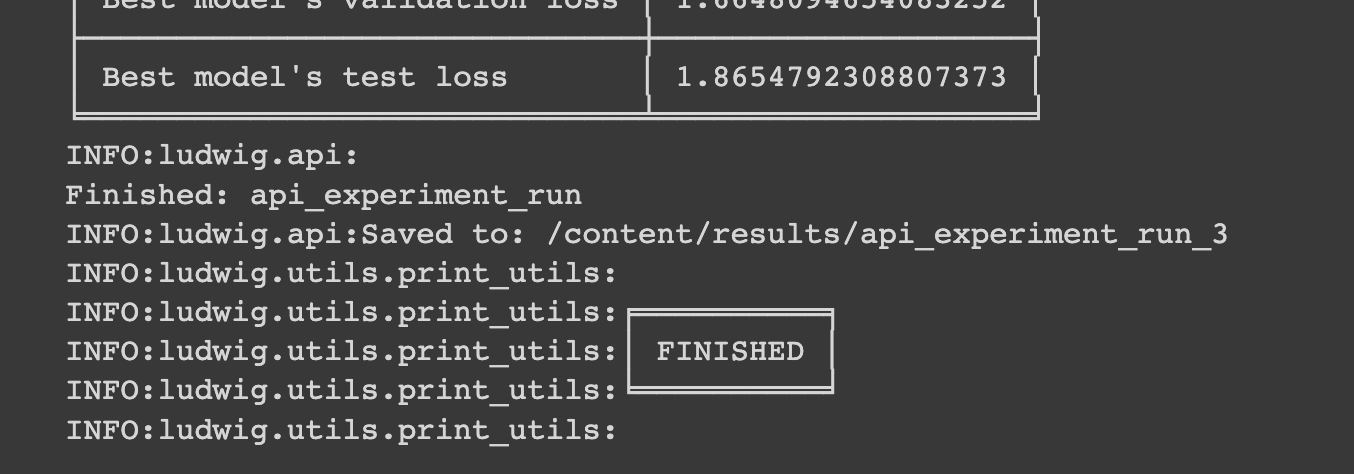

In [ ]:
!ludwig upload hf_hub --repo_id arnavgrg/ludwig-webinar --model_path /content/results/api_experiment_run_3


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-c

#### Want to try out our QLoRA fine-tuned weights that were fine-tuned on the entire dataset over 3 epochs? Check it out here on HuggingFace 🤗: https://huggingface.co/arnavgrg/codealpaca-qlora

```
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM

config = PeftConfig.from_pretrained("arnavgrg/codealpaca-qlora")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-hf")
model = PeftModel.from_pretrained(model, "arnavgrg/codealpaca-qlora")
```

# **Resources** 🧺

- If you're new to LLMs, check out this webinar where Daliana Liu discusses the 10 things to know about LLMs: https://www.youtube.com/watch?v=fezMHMk7u5o&t=2027s&ab_channel=Predibase
- Ludwig 0.8 Release Blogpost for the full set of new features: https://predibase.com/blog/ludwig-v0-8-open-source-toolkit-to-build-and-fine-tune-custom-llms-on-your-data
- Ludwig Documentation: https://ludwig.ai/latest/

# **Try Predibase: The first low-code AI platform for developers**

If you're interested in a managed solution for training larger LLMs that require distributed training using multi-node multi-GPU setups, or for fast on-demand inference for LLMs, check out [Predibase](https://predibase.com/), the AI platform for engineers built on top of Ludwig! Try our free 14 day trial here by signing up [here](https://pbase.ai/3OD77wQ)

## How can Predibase help me with fine-tuning?
Here's a 6 minute read through of the challenges that fine-tuning poses, and how Predibase solves all of them for you. You can fine-tune Llama-2 with Scalable LLM infrastructure through Predibase: https://predibase.com/blog/how-to-fine-tune-llama-2-on-your-data-with-scalable-llm-infrastructure

### Check out these great blog posts and webinars on LLMs
1. Beyond Chat Use Cases for LLMs in Production: https://predibase.com/blog/beyond-chat-use-cases-for-llms-in-production
2. From Unstructured to Structured Data with Predibase: https://www.youtube.com/watch?v=KMZ_OSJ6bOE&t=523s&ab_channel=Predibase
3. Build your own LLM in less than 10 lines of code: https://www.youtube.com/watch?v=efMQgwM9dFY&ab_channel=Predibase